In [1]:
%pylab inline
from pathlib import Path
import sys
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import io3d # just to get data
import scaffan.image as scim
from typing import List
import exsu

import scaffan.slide_segmentation

Populating the interactive namespace from numpy and matplotlib
add path C:\Users\Jirik\Downloads\openslide-win64-20171122\bin


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Example

In [2]:
fn = io3d.datasets.join_path("medical", "orig", "Scaffan-analysis", "PIG-003_J-18-0165_HE.ndpi", get_root=True)
# fn = io3d.datasets.join_path("medical", "orig", "sample_data", "SCP003", "SCP003.ndpi", get_root=True)
# fn = io3d.datasets.join_path("medical", "orig", "Scaffan-analysis", "PIG-003_J-18-0166_HE.ndpi", get_root=True)
print(f"filename: {fn}")

filename: C:/Users/Jirik/data/medical\orig\Scaffan-analysis\PIG-003_J-18-0165_HE.ndpi


In [5]:
# report = exsu.report.Report()
# report.init_with_output_dir(".report_dir")
report=None
seg = scaffan.slide_segmentation.SlideSegmentation(report=report)
dir(seg)
anim = scim.AnnotatedImage(fn)
seg.init(anim)
# seg._find_best_level()

2019-10-18 09:04:13.703 | DEBUG    | scaffan.image:__init__:194 - Reading file C:/Users/Jirik/data/medical\orig\Scaffan-analysis\PIG-003_J-18-0165_HE.ndpi
2019-10-18 09:04:13.714 | DEBUG    | scaffan.image:__init__:208 - Reading the annotation
2019-10-18 09:04:14.711 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-10-18 09:04:14.607 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'
2019-10-18 09:04:14.718 | DEBUG    | scaffan.slide_segmentation:_find_best_level:241 - wanted pixelsize mm=[0.01 0.01]
2019-10-18 09:04:14.720 | DEBUG    | scaffan.slide_segmentation:_find_best_level:257 - real pixelsize mm=[0.0072719 0.0072805]


In [15]:

# ann_ids = seg.anim.select_annotations_by_color("#FF0000")
print(seg.anim.select_annotations_by_color("#000000"))
print(seg.anim.select_annotations_by_color("#FF0000"))
print(seg.anim.select_annotations_by_color("#00FF00"))
print(seg.anim.select_annotations_by_color("#0000FF"))
print(seg.anim.select_annotations_by_color("#00FFFF"))
print(seg.anim.select_annotations_by_color("#FF00FF"))
print(seg.anim.select_annotations_by_color("#FFFF00"))
print(seg.anim.select_annotations_by_color("#FFFFFF", raise_exception_if_not_found=False))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 28, 33]
[20, 21, 22, 23, 30, 32]
[0, 3, 5, 8, 34]
[1, 4, 6, 9]
[2, 24]
[27, 29, 31]
[7]
[35, 36]


In [10]:
# def select_outer_annotations(self, color, return_holes=True, ann_ids:List[int]=None)->List:
#     ann_ids = self.select_annotations_by_color(color, ann_ids=ann_ids)
#     ann_pairs = [[aid, self.select_inner_annotations(aid, ann_ids=ann_ids)] for aid in ann_ids if len(self.select_outer_annotations(aid, ann_ids=ann_ids)) == 0]
#     outer_inds, holes = zip(*ann_pairs)
#     if return_holes:
#         return list(outer_inds), list(holes)
#     else:
#         return list(outer_inds)
    

# outer_ids, holes_ids = seg.anim.select_just_outer_annotations("#000000")
             

In [1]:
# def _get_pixels(self, color):
#     """
#     Use outer annotation with defined color and removed holes to 
#     extract features in pixels.
#     """
#     outer_ids, holes_ids = self.anim.select_just_outer_annotations(color)
#     views = self.anim.get_views(outer_ids, level=self.level)
#     pixels_list = []
#     for id1, id2, view_ann in zip(outer_ids, holes_ids, views):
#         ann_raster = view_ann.get_annotation_raster(id1, holes_ids=id2)
# #     ann_raster1 = view_ann.get_annotation_region_raster(id1)
# #     if len(id2) == 0:
# #         ann_raster = ann_raster1
# #     else:
# #         ann_raster2 = view_ann.get_annotation_region_raster(id2[0])
# #         ann_raster = ann_raster1 ^ ann_raster2

#         plt.figure()
#         plt.imshow(ann_raster)
#         plt.show()
#         img = self._get_features(view_ann)
#         pixels = img[ann_raster]
#         pixels_list.append(pixels)
#     pixels_all = np.concatenate(pixels_list, axis=0)

#     return pixels_all
# pixels_all = _get_pixels(seg, "#000000")
# pixels_all.shape


In [8]:
type(ann_raster)

numpy.ndarray

# Training

In [41]:
seg.train_svm_classifier()
seg.save_classifier()

2019-10-18 09:35:53.091 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 0, 0
2019-10-18 09:35:53.109 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 0, 8192
2019-10-18 09:35:53.120 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 0, 16384
2019-10-18 09:35:53.135 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 0, 24576
2019-10-18 09:35:53.147 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 0, 32768
2019-10-18 09:35:53.156 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 0, 40960
2019-10-18 09:35:53.165 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 8192, 0
2019-10-18 09:35:53.172 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 8192, 8192
2019-10-18 09:35:53.184 | DEBUG    | scaffan.slide_segmentation:make_tiles:285 - processing tile 8192, 16384
2019-10-18 09:35:53.195 | DEBUG    | scaffan.sl

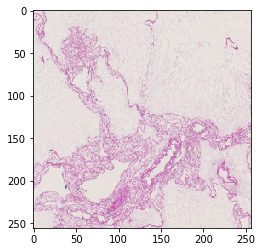

In [6]:
seg.make_tiles()
img = seg.tiles[2][2].get_region_image()
plt.imshow(img)

In [ ]:
fts = seg

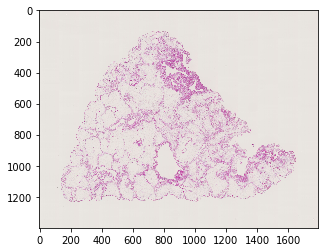

In [7]:
plt.imshow(seg.get_raster_image())

# Features

In [65]:
from scipy.ndimage import gaussian_filter
import skimage
from sklearn.naive_bayes import GaussianNB
import numpy as np
from skimage.feature import peak_local_max
import skimage.filters
from skimage.morphology import disk
import scipy.ndimage
from scipy import stats

def get_features(self, view):
        """
        Three colors and one gaussian smooth reg channel.

        img_sob: gaussian blure applied on gradient sobel operator give information about texture richness in neighborhood

        """
        img = view.get_region_image(as_gray=False)
        print(img.dtype)
        img_gauss2 = gaussian_filter(img[:, :, 0], 2)
        img_gauss5 = gaussian_filter(img[:, :, 0], 5)

        img = np.copy(img)
        imgout = np.zeros([img.shape[0], img.shape[1], 9], dtype=np.uint8)
        img_just_sob = skimage.filters.sobel(img[:, :, 0])
        print(f"just_sob {img_just_sob.dtype} stats: {stats.describe(img_just_sob[:], axis=None)}")
#         img_sob = (np.abs(img_just_sob) * 255).astype(np.uint8)
        img_sob = (np.abs(img_just_sob) * 255).astype(np.uint8)
        print(f"sob {img_sob.dtype} stats: {stats.describe(img_sob[:], axis=None)}")
        img_sob_gauss2 = gaussian_filter(img_sob, 2)
        img_sob_gauss5 = gaussian_filter(img_sob, 5)
        img_sob_median = skimage.filters.median((img_just_sob * 2000).astype(np.uint8), disk(10))

        imgout[:, :, :3] = img[:, :, :3]
        imgout[:, :, 3] = img_gauss2
        imgout[:, :, 4] = img_gauss5
        imgout[:, :, 5] = img_sob
        imgout[:, :, 6] = img_sob_gauss2
        imgout[:, :, 7] = img_sob_gauss5
        imgout[:, :, 8] = img_sob_median
        return imgout

uint8
just_sob float64 stats: DescribeResult(nobs=65536, minmax=(0.0, 0.35622788821616), mean=0.021438372177618743, variance=0.0004190097086773471, skewness=2.1573219653036353, kurtosis=10.723297610649539)
sob uint8 stats: DescribeResult(nobs=65536, minmax=(0, 90), mean=5.003997802734375, variance=27.122285077831442, skewness=2.167676343932836, kurtosis=10.789460220181846)


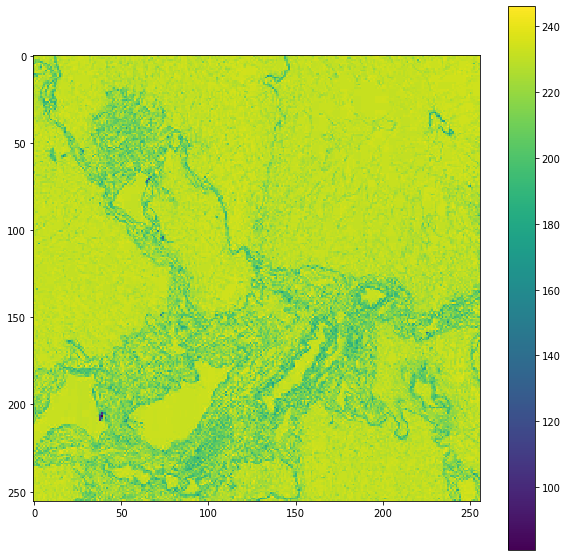

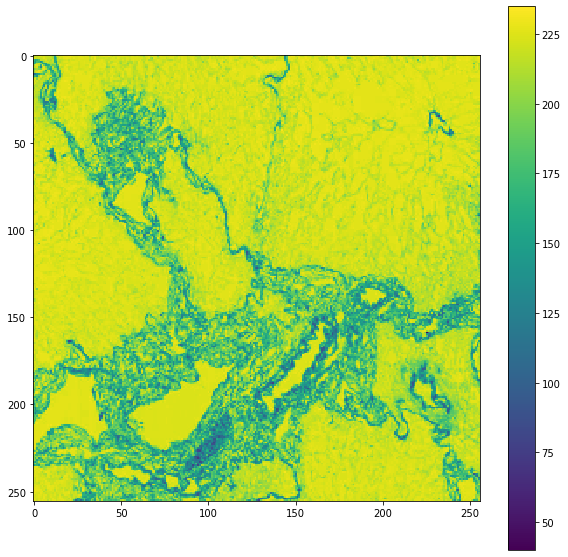

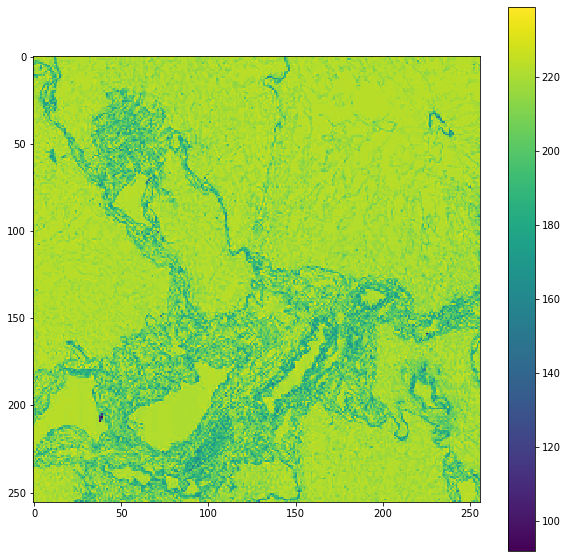

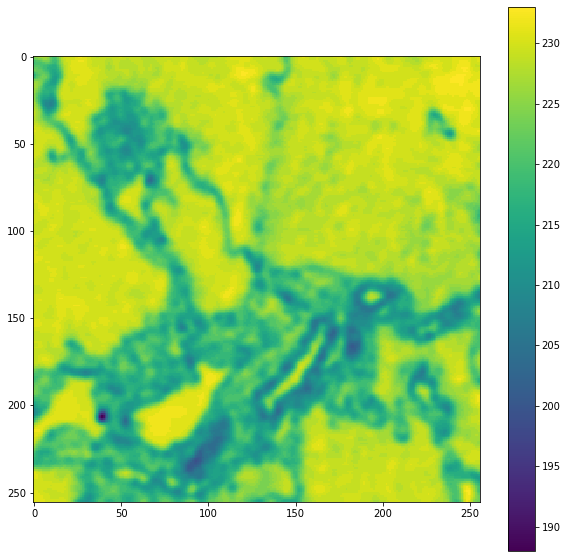

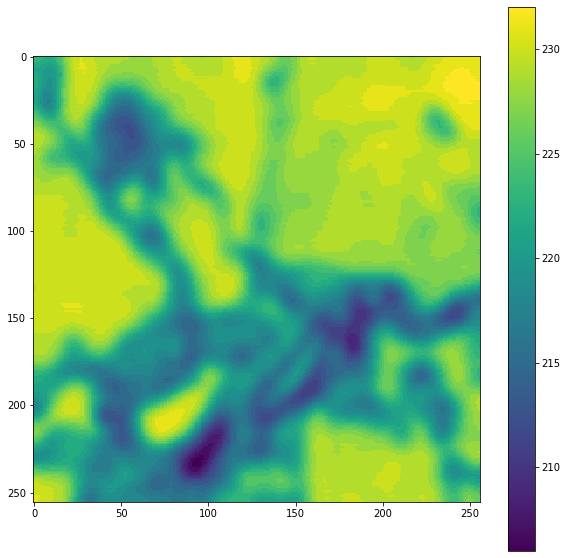

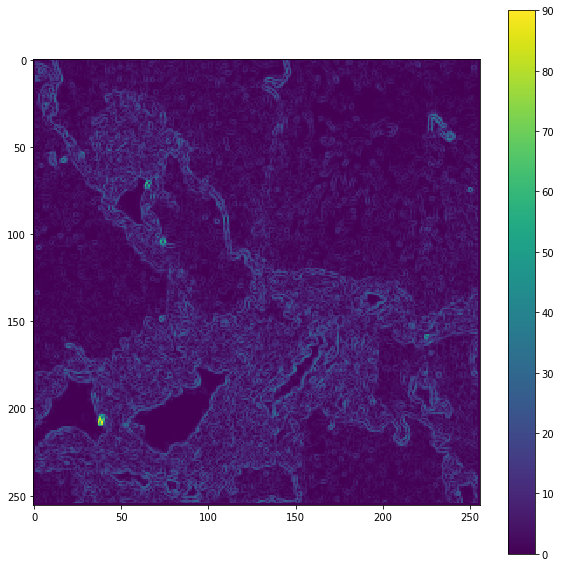

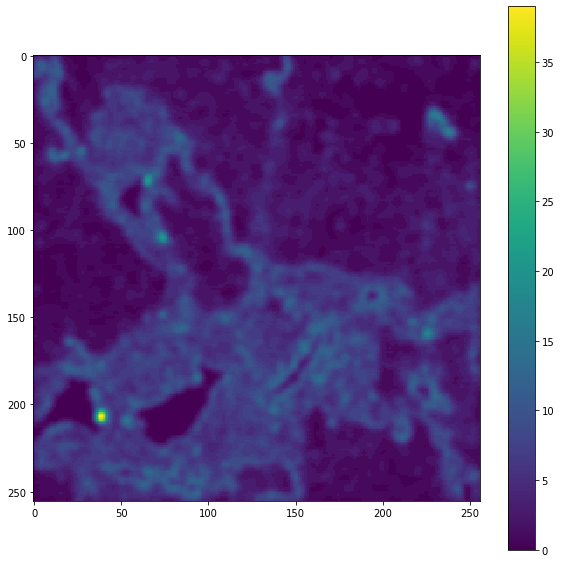

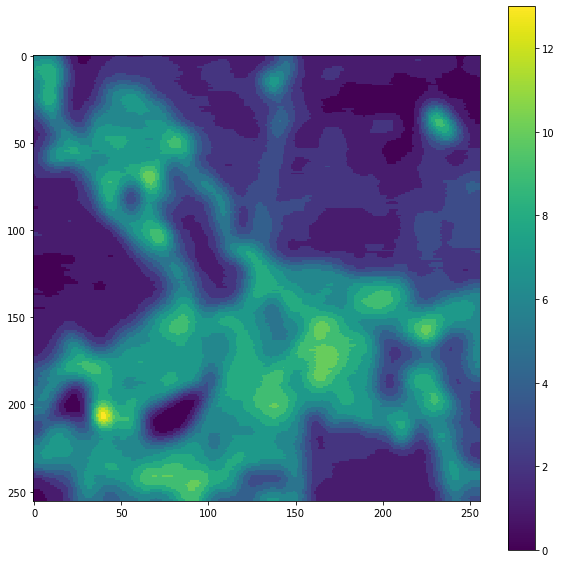

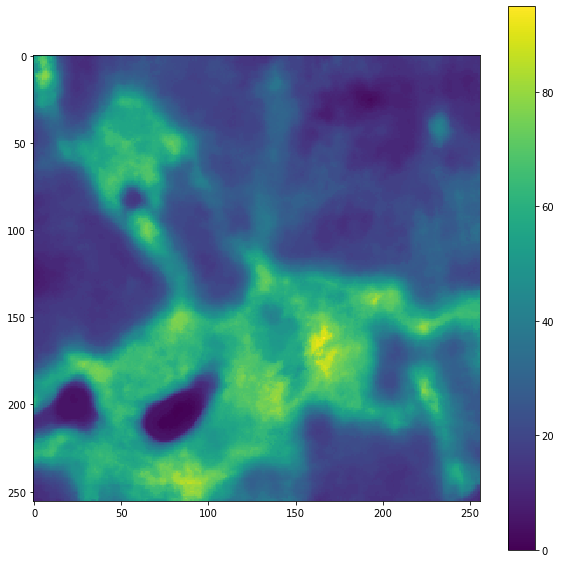

In [66]:

pred = get_features(seg, seg.tiles[2][2])
for i in range(0,pred.shape[2]):
    plt.figure(figsize(10,10))
    plt.imshow(pred[:,:,i])
    plt.colorbar()

In [9]:

pred = seg._get_features(seg.tiles[2][2])

img_sob = skimage.filters.sobel(pred[:,:,0]/255)

img_sob = skimage.filters.median(img_sob, disk(5) )
# img_sob = gaussian_filter(skimage.filters.sobel(pred[:,:,0]), 2)
plt.figure(figsize(10,10))
plt.imshow(img_sob)
plt.colorbar()

NameError: name 'skimage' is not defined

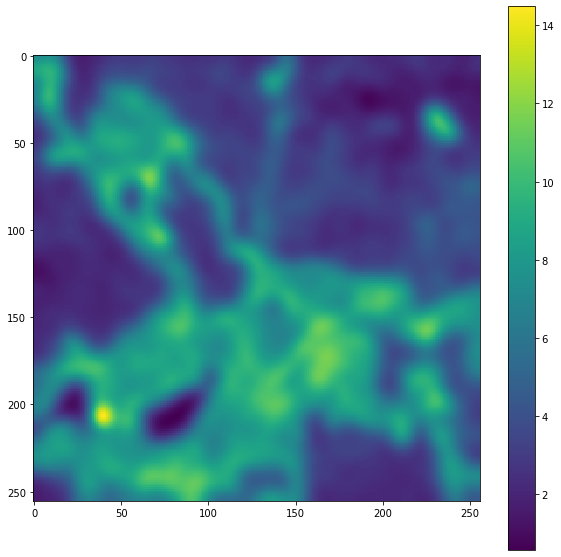

In [29]:
pred = seg._get_features(seg.tiles[2][2])

# img_sob = skimage.filters.sobel(pred[:,:,0]/255)

# img_sob = skimage.filters.median(img_sob, disk(5) )
img_sob = gaussian_filter(skimage.filters.sobel(pred[:,:,0]), 5)
plt.figure(figsize(10,10))
plt.imshow(img_sob)
plt.colorbar()

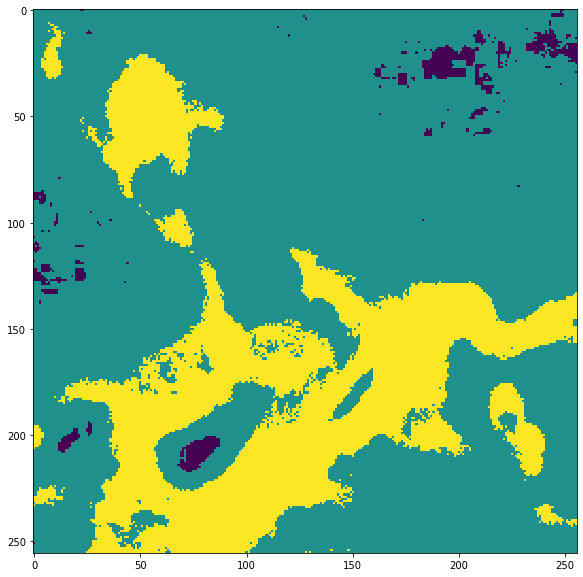

In [50]:
pred = seg.predict_on_view(seg.tiles[2][2])
plt.imshow(pred)

In [484]:
# seg.predict_tiles()

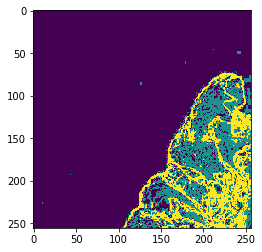

In [485]:
# plt.imshow(seg.predicted_tiles[1][1])

In [39]:
full_image = seg.predict()
seg.full_output_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2]])

In [251]:
# def predict(self):
# #         if self.predicted_tiles is None:
# #             self.predict_tiles()
        
#         szx = len(self.tiles)
#         szy = len(self.tiles[0])
#         print(f"size x={szx} y={szy}")
        
#         imsize, tile_size_on_level0, tile_size_on_level, imsize_on_level = self._get_tiles_parameters()
#         output_image = np.zeros(self.tile_size * np.asarray([szy, szx]), dtype=int )
#         for iy, tile_column in enumerate(self.tiles):
#             for ix, tile in enumerate(tile_column):
#                 output_image[
#                     ix * self.tile_size[0]: (ix + 1) * self.tile_size[0],
#                     iy * self.tile_size[1]: (iy + 1) * self.tile_size[1]
# #                     int(x0):int(x0 + tile_size_on_level[0]), 
# #                     int(y0):int(y0 + tile_size_on_level[1])    
# #                 ] = self.tiles[ix][iy].get_region_image(as_gray=True)
# #                 ] = self.tiles[iy][ix].get_region_image(as_gray=True)
#                 ] = self.predicted_tiles[iy][ix]
                
#                 pass
#         full_image = output_image[:int(imsize_on_level[1]), :int(imsize_on_level[0])]
#         return full_image
# full_image = predict(seg)

size x=7 y=6


In [21]:
seg.run()

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\

2019-10-07 14:31:04.449 | DEBUG    | exsu.report:imsave:111 - write to file: .report_dir\slice_label.png
2019-10-07 14:31:04.706 | DEBUG    | exsu.report:imsave:111 - write to file: .report_dir\slice_raster.png


In [81]:
plt.imsave('pokus2.png', seg.full_output_image)

In [60]:
img = seg.get_raster_image()

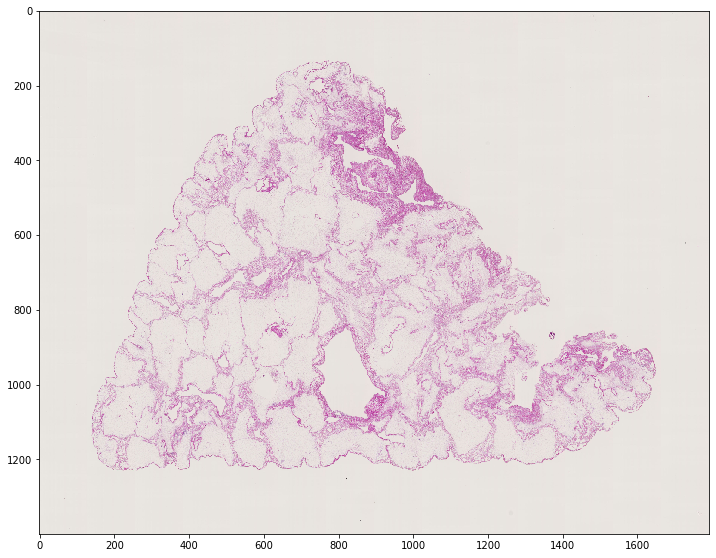

In [22]:

plt.figure(figsize=(12,12))
plt.imshow(
#     seg.full_output_image
    seg.full_raster_image
#     img
#     full_image[500:1000, 500:1000]
)
# plt.colorbar()

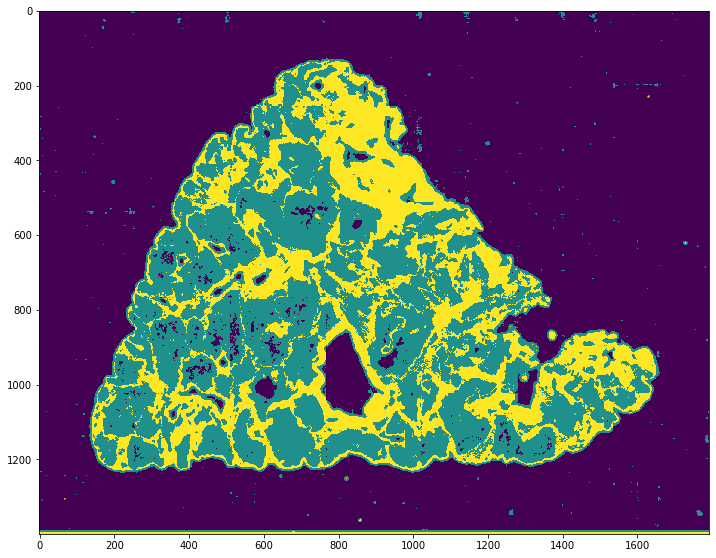

In [23]:

plt.figure(figsize=(12,12))
plt.imshow(
    seg.full_prefilter_image
#     seg.full_raster_image
#     img
#     full_image[500:1000, 500:1000]
)
# plt.colorbar()

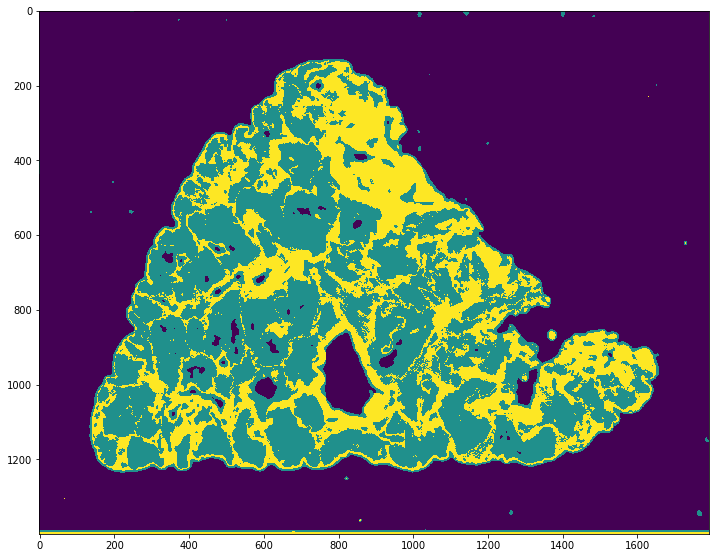

In [24]:

plt.figure(figsize=(12,12))
plt.imshow(
    seg.full_output_image
#     seg.full_raster_image
#     img
#     full_image[500:1000, 500:1000]
)
# plt.colorbar()

In [41]:
window1 = [slice(1000,1500), slice(1000, 1500)]
window2 = [slice(500,1000), slice(500, 1000)]
window3 = [slice(1000,1500), slice(500, 1000)]

# Looking for big enough area

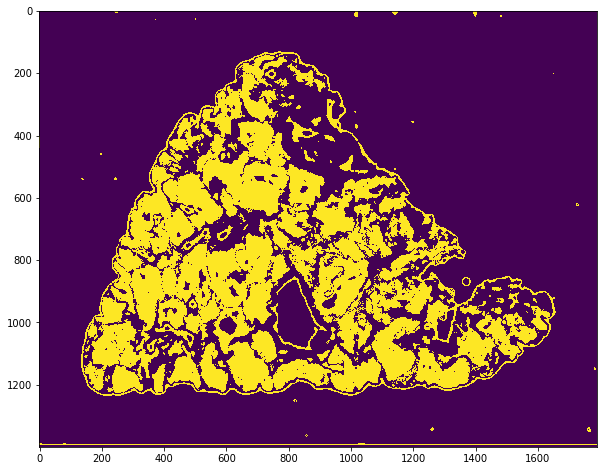

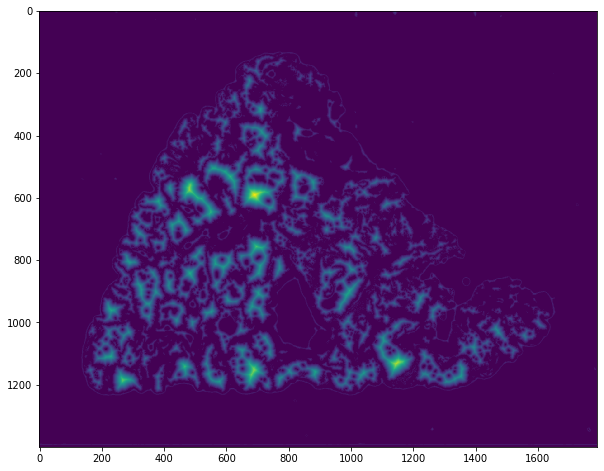

In [44]:
import scipy.ndimage
# dist = scipy.ndimage.morphology.distance_transform_edt(tmp_img != 2)
mask = seg.full_output_image == 1
dist = scipy.ndimage.morphology.distance_transform_edt(mask)
plt.figure(figsize=[10,10])
plt.imshow((mask).astype(np.int))
plt.figure(figsize=[10,10])
plt.imshow(dist)

In [45]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

In [78]:

# plt.figure(figsize=(10,10))
# plt.imshow(dist, cmap=plt.cm.gray)
# plt.autoscale(False)
# plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
# plt.axis('off')
# plt.set_title('Peak local max')


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


(-0.5, 1791.5, 1399.5, -0.5)

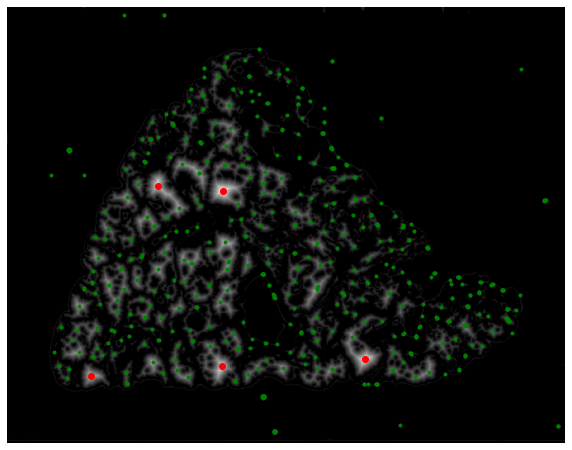

In [81]:
n_max = 5
image_max = ndi.maximum_filter(dist, size=20, mode='constant')
# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(dist, min_distance=20)
point_dist = dist[list(zip(*coordinates))] 
# display(point_dist)
max_point_inds = point_dist.argsort()[-n_max:][::-1]
max_points = coordinates[max_point_inds]

plt.figure(figsize=(10,10))
plt.imshow(dist, cmap=plt.cm.gray)
plt.autoscale(False)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'g.')
plt.plot(max_points[:, 1], max_points[:, 0], 'ro')
plt.axis('off')

In [ ]:
def find_biggest_lobuli(self, n_max:int=5)
    """
    :param n_max: Number of points. All points are returned if set to 0.
    """
    mask = self.full_output_image == 1
    dist = scipy.ndimage.morphology.distance_transform_edt(mask)
    self.dist = dist
    # report
    
    
    image_max = ndi.maximum_filter(dist, size=20, mode='constant')
    # Comparison between image_max and im to find the coordinates of local maxima
    coordinates = peak_local_max(dist, min_distance=20)
    point_dist = dist[list(zip(*coordinates))] 
    # display(point_dist)
    max_point_inds = point_dist.argsort()[-n_max:][::-1]
    max_points = coordinates[max_point_inds]
    self.centers_all = coordinates
    self.centers_max = max_points
    
#     report
    plt.figure(figsize=(10,10))
    plt.imshow(dist, cmap=plt.cm.gray)
    plt.autoscale(False)
    plt.plot(coordinates[:, 1], coordinates[:, 0], 'g.')
    plt.plot(max_points[:, 1], max_points[:, 0], 'ro')
    plt.axis('off')
    
    return max_points


In [2]:
arr = [0,1,2,3,4,5]
arr[-1:]

[5]

# something else

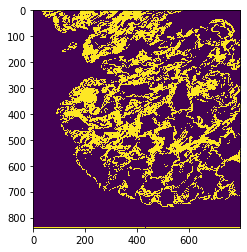

In [119]:
im_cr = seg.full_output_image[1000:1900, 200:1000]
plt.imshow((im_cr==2))
# plt.colorbar()

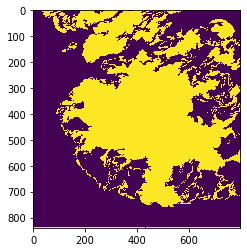

In [120]:
filled = scipy.ndimage.morphology.binary_fill_holes(im_cr==2)
plt.imshow(filled)

## Label filtration

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq

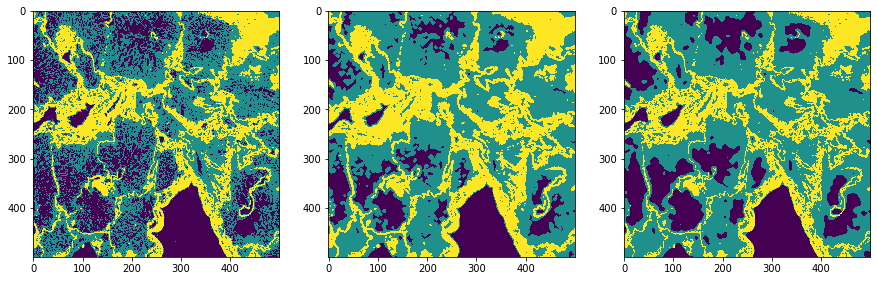

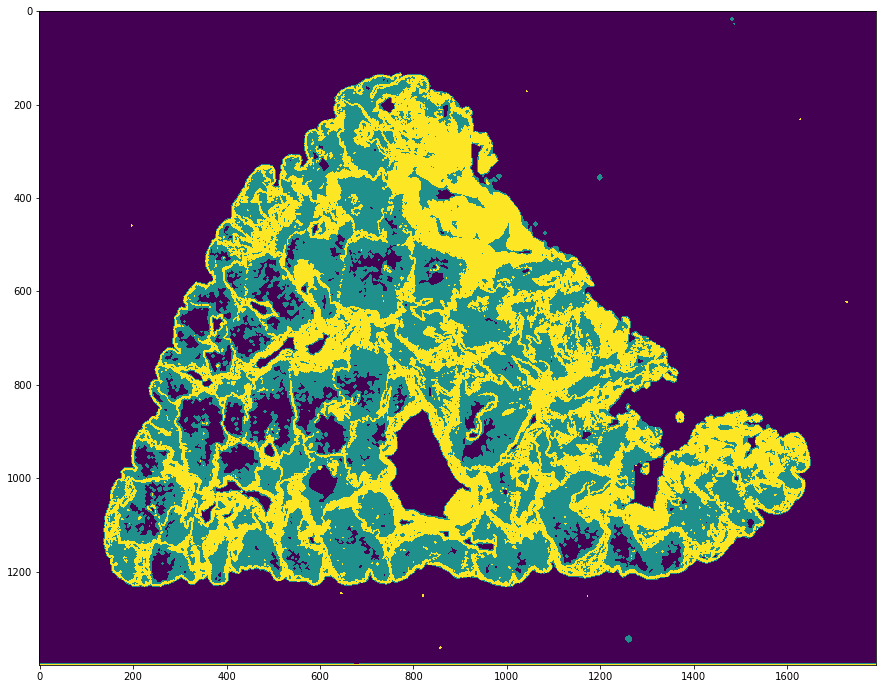

In [197]:

def _labeling_filtration(self, full_image):
    """
    smooth label 0 and label 1, keep label 2
    """
    tmp_img = full_image.copy()
    tmp_img[full_image == 2] = 1
    import skimage.filters
    tmp_img = skimage.filters.gaussian(tmp_img.astype(np.float), sigma=2)

    tmp_img = (tmp_img > 0.5).astype(np.int)
    tmp_img[full_image == 2] = 2
    return tmp_img

imf = _labeling_filtration(seg, seg.full_prefilter_image)
# remove small internal holes in ligament
ligament = scipy.ndimage.morphology.binary_dilation(imf==2, iterations=1)
label = seg.full_output_image.copy()
# remove small holes in intralobular area
intralobular = scipy.ndimage.morphology.binary_dilation(imf==1, iterations=2)
label[intralobular] = 1
label[ligament] = 2

window = window2

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(seg.full_prefilter_image[window])
plt.subplot(132)
plt.imshow(label[window])
plt.subplot(133)
plt.imshow(seg.full_output_image[window])
plt.figure(figsize=(15,15))
plt.imshow(label)

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


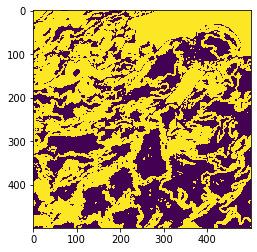

In [144]:
plt.imshow((label[window3]!=1))

In [88]:
dist_cr = dist[500:1000, 500:1000]

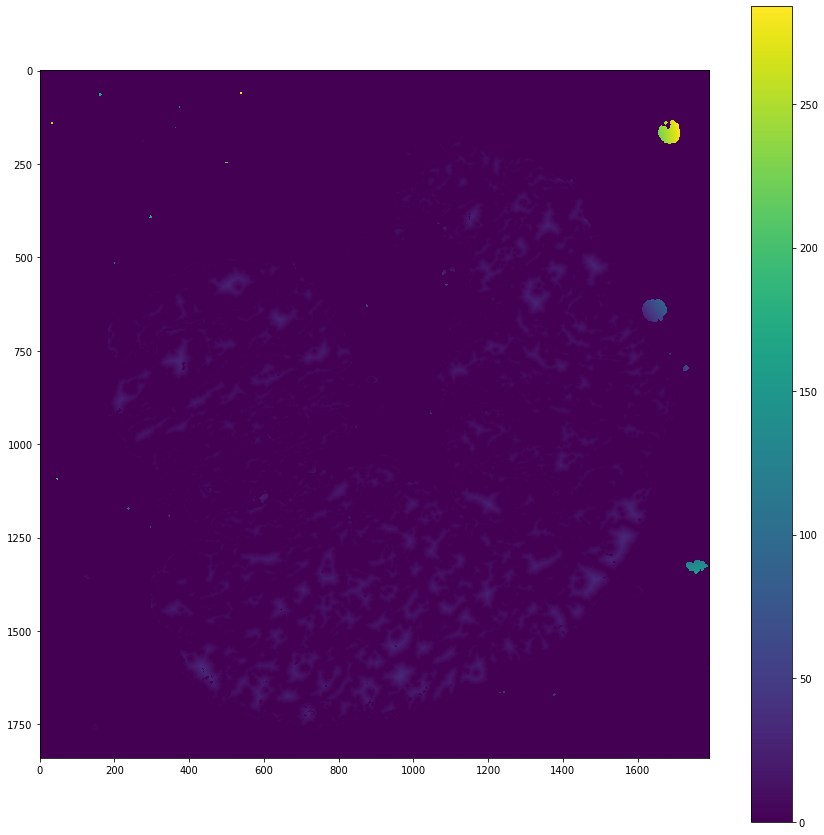

In [168]:
plt.figure(figsize=(15,15))
plt.imshow(scipy.ndimage.morphology.distance_transform_edt(label!=2) * (label == 1).astype(np.int))
plt.colorbar()

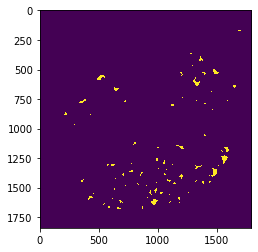

In [165]:
plt.imshow(dist > 15)

In [292]:
tmp_img > 0.5

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False]])

In [257]:
_, count = np.unique(full_image, return_counts=True)

intralobular_ratio = count[2] / (count[1] + count[2])

intralobular_ratio

0.35995119921974683

In [110]:
seg.predicted_tiles[41]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [245]:
full_image

In [ ]:
seg

# Gradient operators

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


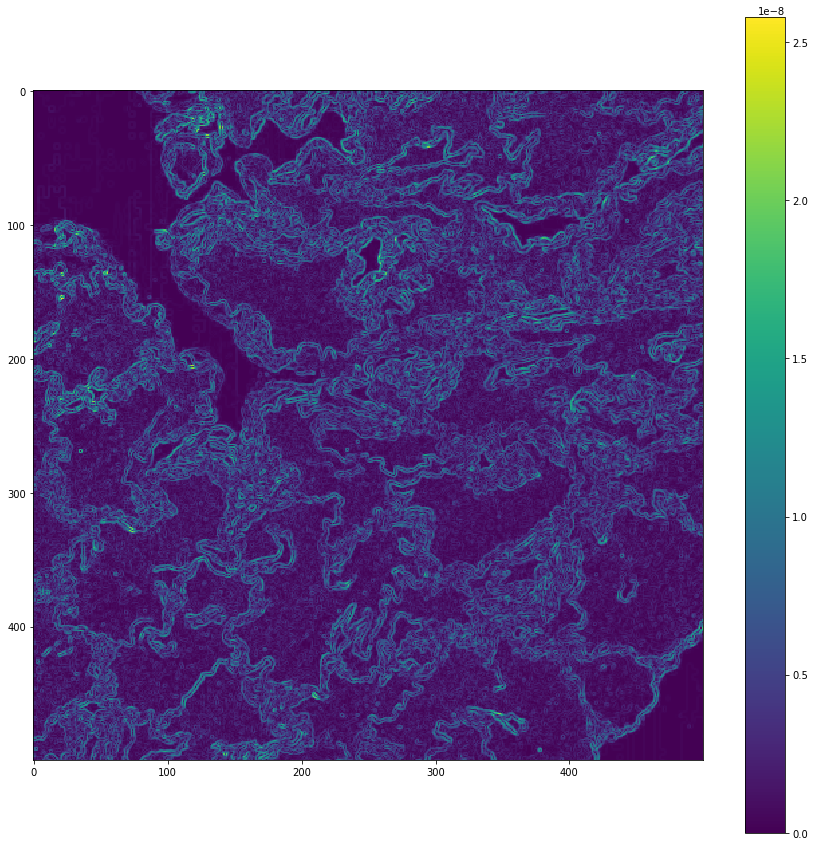

In [177]:
import skimage.filters
sob = skimage.filters.sobel(seg.full_raster_image[:,:,0])
plt.figure(figsize=(15, 15))
plt.imshow(sob[window1])
plt.colorbar()

# Other clasifiers

In [37]:
X, y = seg.prepare_training_pixels()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.98, random_state=42)
X_train.shape

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(3357, 8)

In [36]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
]

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
#          "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "QDA",
         "Naive Bayes", 
        ]

fit Nearest Neighbors
fit done: Nearest Neighbors
score Nearest Neighbors: 0.9673447309723648


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


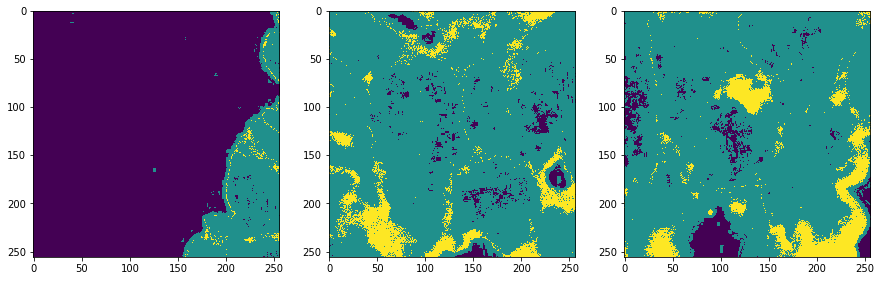

fit Linear SVM
fit done: Linear SVM
score Linear SVM: 0.9670833915775783


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


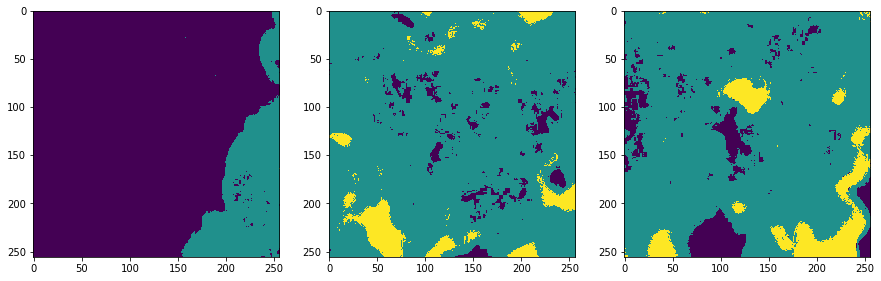

fit RBF SVM
fit done: RBF SVM
score RBF SVM: 0.6874259285145591


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


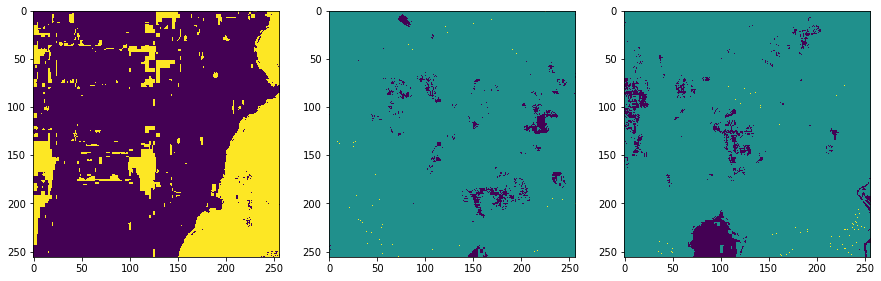

fit Decision Tree
fit done: Decision Tree
score Decision Tree: 0.979493973999769


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


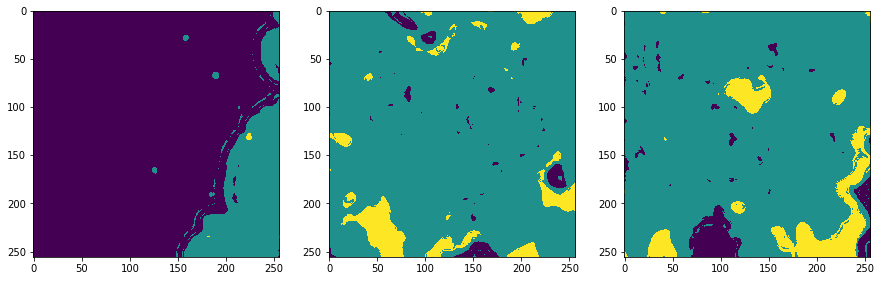

fit Random Forest
fit done: Random Forest
score Random Forest: 0.9761087171882312


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


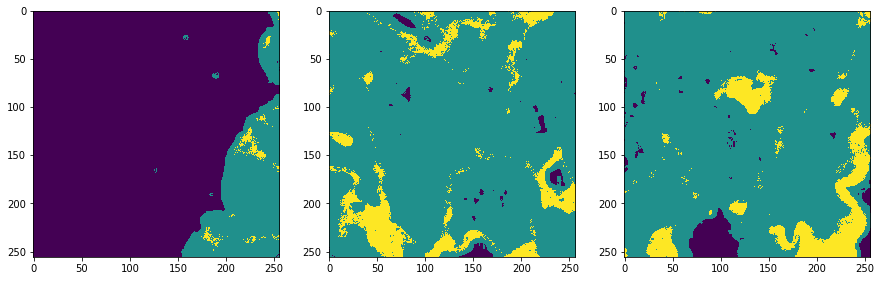

fit Neural Net
fit done: Neural Net
score Neural Net: 0.9449303196241575


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


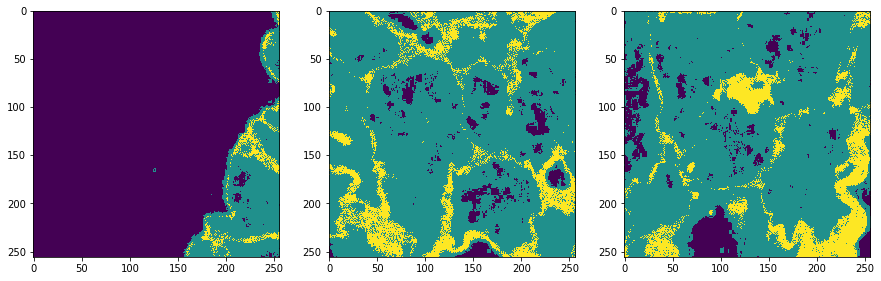

fit AdaBoost
fit done: AdaBoost
score AdaBoost: 0.9729787221111361


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


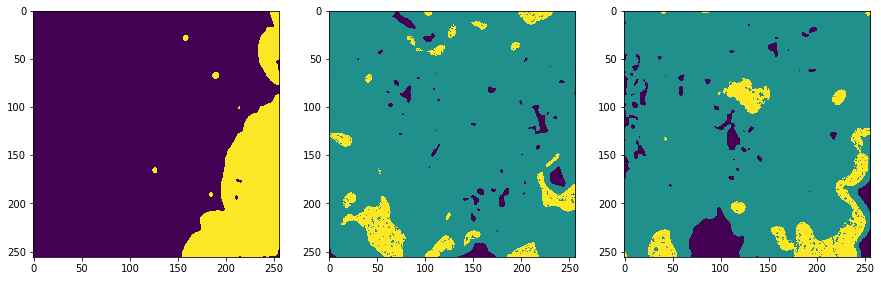

fit QDA
fit done: QDA
score QDA: 0.9643059008004279


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


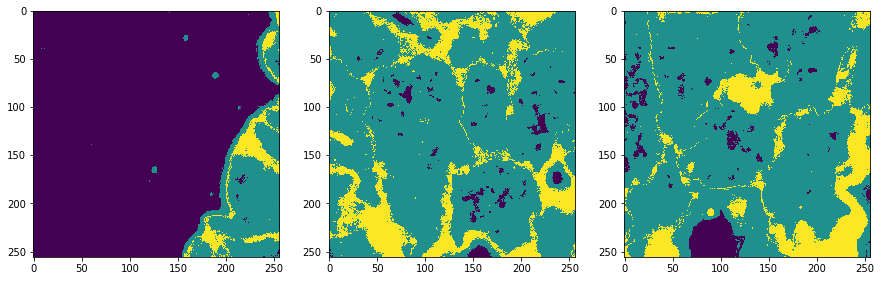

fit Naive Bayes
fit done: Naive Bayes
score Naive Bayes: 0.9510687565714703


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


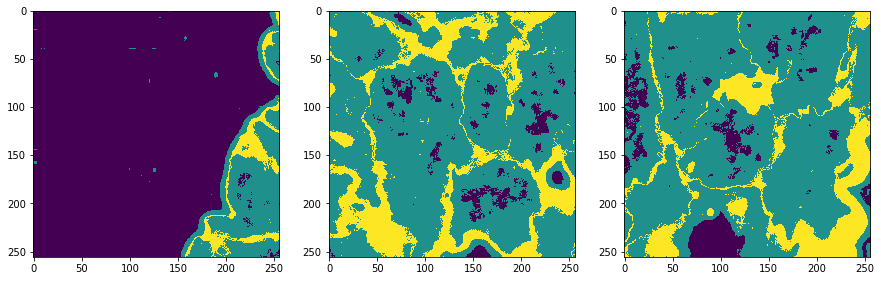

In [38]:
for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    print(f"fit {name}")
    clf.fit(X_train, y_train)
    print(f"fit done: {name}")
    score = clf.score(X_test, y_test)
    print(f"score {name}: {score}")
    seg.clf = clf
    plt.figure(figsize=(15,10))
    plt.subplot(131)    
    pred = seg.predict_on_view(seg.tiles[0][3])
    plt.imshow(pred)
    plt.subplot(132)    
    pred = seg.predict_on_view(seg.tiles[1][3])
    plt.imshow(pred)
    plt.subplot(133)    
    pred = seg.predict_on_view(seg.tiles[2][3])
    plt.imshow(pred)
    plt.show()
    

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\Jirik\

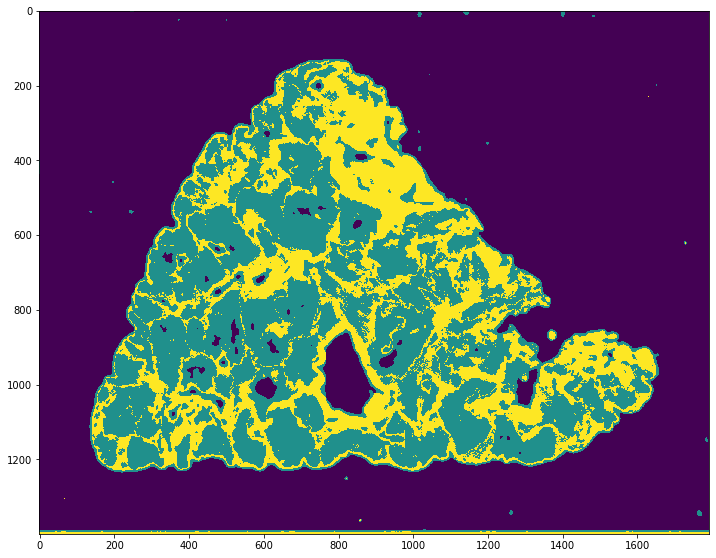

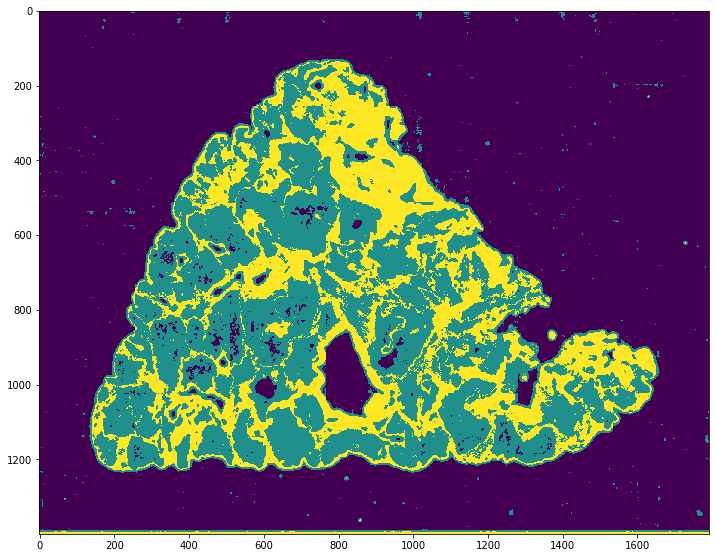

In [40]:
seg.run()

plt.figure(figsize=(12,12))
plt.imshow(
    seg.full_output_image
#     seg.full_raster_image
#     img
#     full_image[500:1000, 500:1000]
)
plt.figure(figsize=(12,12))
plt.imshow(
    seg.full_prefilter_image
#     seg.full_raster_image
#     img
#     full_image[500:1000, 500:1000]
)